In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import pylab as pl
import numpy as np
import xarray as xr
import sys
sys.path.append('../')
import spym
# Using the old loader
from spym.io import rhksm4
# import new xarray data structure
from rhkpy import rhkpy

# map

In [135]:
filename_map = 'hopg_300k_2020_08_11_16_04_06_999.sm4'
mapspec = rhkpy.stmdata(filename_map)

map
iv


In [141]:
mapspec.specmap.attrs

{'filename': 'hopg_300k_2020_08_11_16_04_06_999.sm4',
 'bias': 0.39999998,
 'bias units': 'V',
 'setpoint': 499.99998585903427,
 'setpoint units': 'pA',
 'measurement date': '08/11/20',
 'measurement time': '15:49:04'}

# Reorganize $dI/dV$ line spectra

In [150]:
filename_line = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy.stmdata(filename_line, datatype = 'line')

In [151]:
linespec.spectra.attrs

{'filename': 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4',
 'bias': 0.49999988,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '11:32:09'}

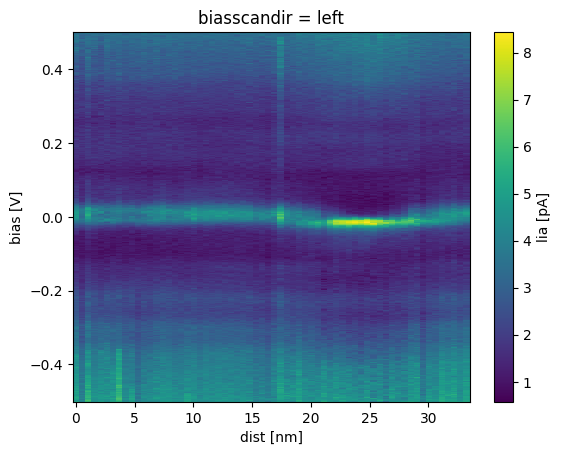

In [134]:
linespec.specline.isel(biasscandir = 0)['lia'].plot()

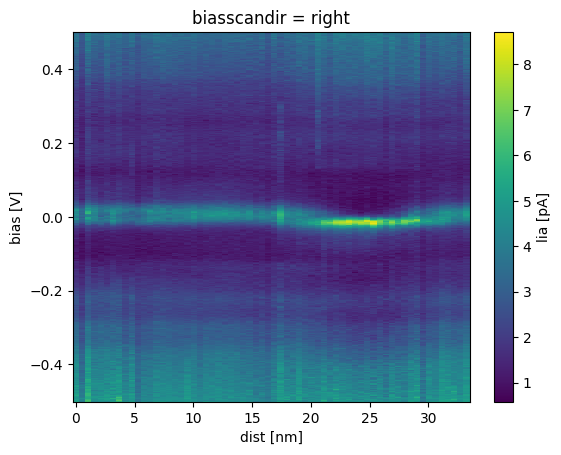

In [123]:
linespec.specline.isel(biasscandir = 1)['lia'].plot()